In [94]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.externals import joblib
print('Libraries Imported')

res1=pd.read_csv('df3dec3.csv')
print(res1.head())
print(len(res1))

Libraries Imported
   lookback  mediantimepast  ...  adjustedrelativegain  newgamma
0       144               3  ...             -0.818561         1
1       144               3  ...             -0.820700         1
2       144               3  ...             -0.817145         1
3       144               3  ...             -0.780100         2
4       144               3  ...             -0.770003         2

[5 rows x 18 columns]
26334


In [31]:
factor = pd.factorize(res1['newgamma'])
res1.newgamma = factor[0]
definitions = factor[1]
print(res1.newgamma.head())
print(definitions)

0    0
1    0
2    0
3    1
4    1
Name: newgamma, dtype: int64
Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], dtype='int64')


In [101]:
#Splitting the data into independent and dependent variables
X = res1.iloc[:,0:16].values
print(X)

y = res1.iloc[:,17].values
print(X)

print(y)
y.shape
print(len(y))
print(len(res1))

[[1.44000000e+02 3.00000000e+00 3.00000000e+01 ... 6.26615630e-02
  0.00000000e+00 0.00000000e+00]
 [1.44000000e+02 3.00000000e+00 3.00000000e+01 ... 6.12742640e-02
  0.00000000e+00 0.00000000e+00]
 [1.44000000e+02 3.00000000e+00 3.00000000e+01 ... 6.16579870e-02
  0.00000000e+00 0.00000000e+00]
 ...
 [2.01600000e+03 5.05000000e+02 3.00000000e+01 ... 4.86415556e-01
  1.00000000e+00 1.00000000e+00]
 [2.01600000e+03 5.05000000e+02 3.00000000e+01 ... 4.82116175e-01
  1.00000000e+00 1.00000000e+00]
 [2.01600000e+03 5.05000000e+02 3.00000000e+01 ... 4.74904603e-01
  1.00000000e+00 1.00000000e+00]]
[[1.44000000e+02 3.00000000e+00 3.00000000e+01 ... 6.26615630e-02
  0.00000000e+00 0.00000000e+00]
 [1.44000000e+02 3.00000000e+00 3.00000000e+01 ... 6.12742640e-02
  0.00000000e+00 0.00000000e+00]
 [1.44000000e+02 3.00000000e+00 3.00000000e+01 ... 6.16579870e-02
  0.00000000e+00 0.00000000e+00]
 ...
 [2.01600000e+03 5.05000000e+02 3.00000000e+01 ... 4.86415556e-01
  1.00000000e+00 1.00000000e+00]

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 21)

In [90]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [91]:
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [92]:
y_pred = classifier.predict(X_test)
#Reverse factorize (converting y_pred from 0s,1s and 2s to Iris-setosa, Iris-versicolor and Iris-virginica
reversefactor = dict(zip(range(20),definitions))
y_test = np.vectorize(reversefactor.get)(y_test)
y_pred = np.vectorize(reversefactor.get)(y_pred)
# Making the Confusion Matrix
print(pd.crosstab(y_test, y_pred, rownames=['Actual values'], colnames=['Predicted values']))

Predicted values   1    2    3    4    5    6   ...   14   15   16   17   18   19
Actual values                                   ...                              
1                 281   53   16    6    3    1  ...    0    0    0    0    0    0
2                  62  246   37   15    8    2  ...    0    0    0    0    0    0
3                  17   48  223   42    9    3  ...    0    0    0    0    0    0
4                   5    6   37  235   39   15  ...    0    0    0    0    0    0
5                   5    5   13   39  217   50  ...    0    0    1    0    0    0
6                   4    6    3   10   21  211  ...    0    0    0    0    0    0
7                   1    2    6    8   10   49  ...    0    0    0    0    0    0
8                   0    2    3    5    5   10  ...    0    0    0    0    0    0
9                   0    2    3    1    1    5  ...    0    0    0    0    0    0
10                  0    1    0    0    5    3  ...    1    0    2    0    0    0
11              

In [93]:
print(list(zip(res1.columns[0:18], classifier.feature_importances_)))
joblib.dump(classifier, 'randomforestmodel.pkl') 

[('lookback', 0.01783507041584656), ('mediantimepast', 0.022496761084028878), ('numsims', 0.0), ('alpha', 0.06112843042038411), ('timewarp', 0.013238063142048031), ('numblocks', 0.0), ('blocktime', 0.0), ('winratio', 0.14279494402574214), ('adjustedwinning', 0.08704246286724655), ('selfishsecondsperblock', 0.09126462161708525), ('relativegain', 0.24693981218433647), ('finalheight', 0.03507975928559968), ('numreorgs', 0.10301403971796394), ('smwinreorgs', 0.1226726300378013), ('didbetternaive', 0.029370085653394606), ('didbettertimeadjust', 0.02712331954852249)]


['randomforestmodel.pkl']

In [61]:
from sklearn.metrics import confusion_matrix
print(y)
print(y_pred)

print(y.shape)
print(y_pred.shape)

y1=np.array(y)
y_pred1=np.array(y_pred)
print(y1)
print(y_pred1)

print(y1.shape)
print(y_pred1.shape)


[ 0  0  0 ... 18 18 18]
[15 11 12 ... 18 11 12]
(26334,)
(6584,)
[ 0  0  0 ... 18 18 18]
[15 11 12 ... 18 11 12]
(26334,)
(6584,)


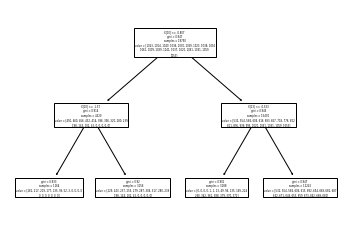

In [70]:
from sklearn.tree import DecisionTreeClassifier
# Step 2: Make an instance of the Model
clf = DecisionTreeClassifier(max_depth = 2, 
                             random_state = 0)
# Step 3: Train the model on the data
clf.fit(X_train, y_train)
# Step 4: Predict labels of unseen (test) data
# Not doing this step in the tutorial
# clf.predict(X_test)
from sklearn import tree
tree.plot_tree(clf);

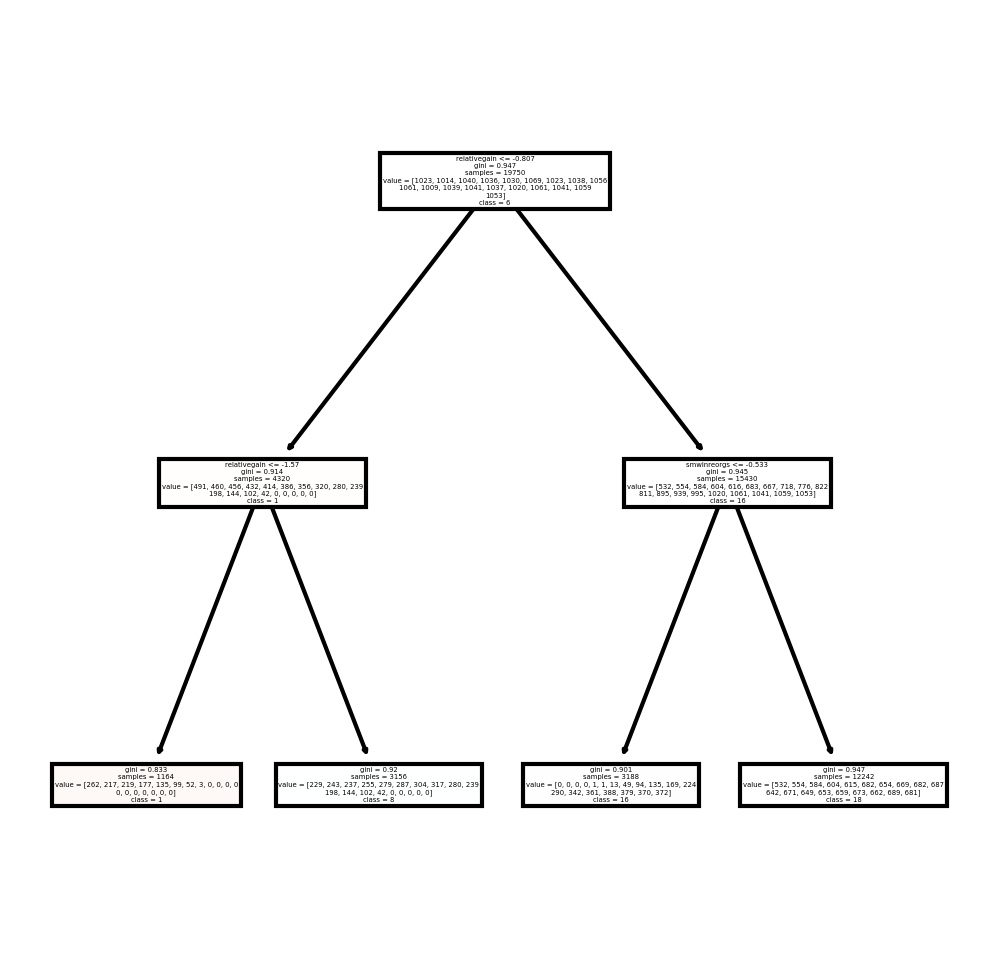

In [86]:
import matplotlib.pyplot as plt
fn=['lookback','mediantimepast','numsims','alpha','timewarp','numblocks','blocktime','winratio','adjustedwinning','selfishsecondsperblock','relativegain','finalheight','numreorgs','smwinreorgs','didbetternaive','didbettertimeadjust']
cn=['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(clf,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('imagename.png')

In [102]:
tree.export_graphviz(clf,
                     out_file="tree.dot",
                     feature_names = fn, 
                     class_names=cn,
                     )

In [104]:
!pip install graphviz

In [105]:
tree.export_graphviz(clf,
                     out_file="tree.dot",
                     feature_names = fn, 
                     class_names=cn,
                     filled = True)

SyntaxError: ignored